## Used analysis code 

`/home/156/cy8964/e14/analysis/scripts/save_10daily_quantities_xhistogram_10yr-old-climtas-dask.py`

to output 10daily and 1 daily quantities for each pseudo-month (11x30 days + 35 days) for 10 years in the folders

`/g/data/e14/cy8964/Post_Process/10_year_daily_data/outputXXX/`

where `XXX=096..105`

Now want to combine into yearly averages, and then later into a 10 year average.

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [2]:
client = Client(n_workers=8)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 120.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39257,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 120.00 GiB
Comm: tcp://127.0.0.1:43275,Total threads: 1
Dashboard: /proxy/43277/status,Memory: 15.00 GiB
Nanny: tcp://127.0.0.1:45329,


Psi_mean_1day


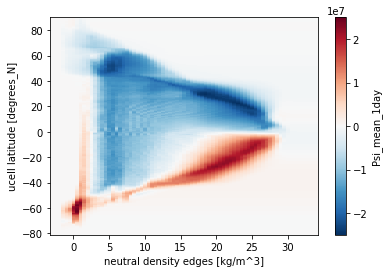

SF_1day


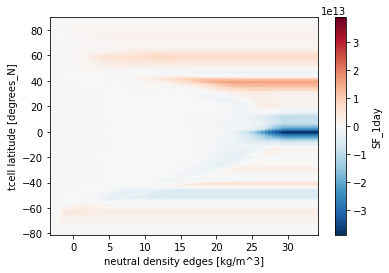

MX_1day


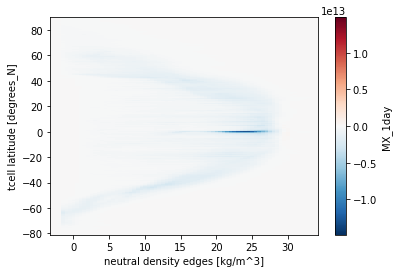

temp_nonlocal_KPP_1day


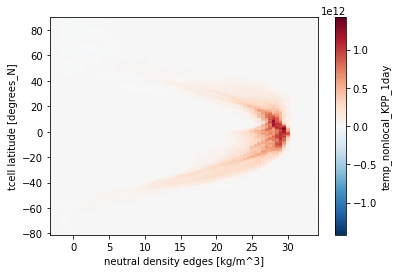

temp_vdiffuse_diff_cbt_kppish_1day


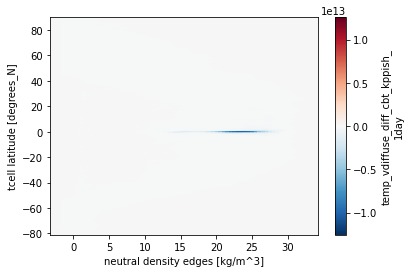

temp_vdiffuse_diff_cbt_kppbl_1day


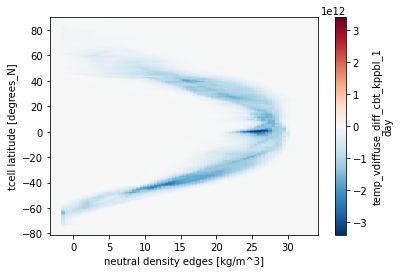

Psi_mean_10day


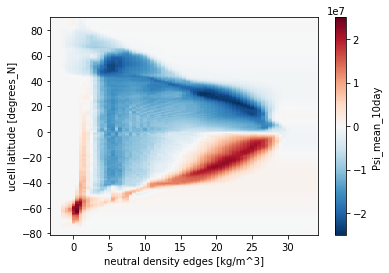

SF_10day


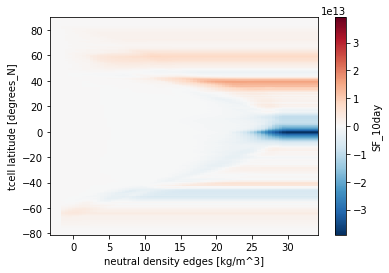

MX_10day


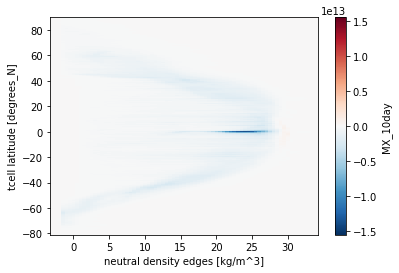

temp_nonlocal_KPP_10day


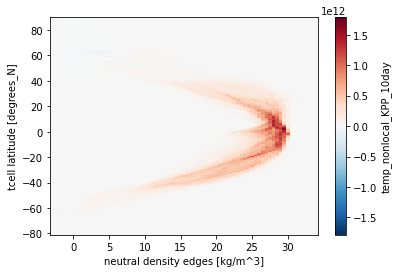

temp_vdiffuse_diff_cbt_kppish_10day


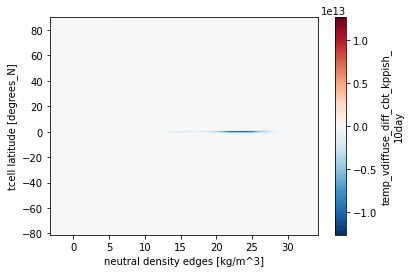

temp_vdiffuse_diff_cbt_kppbl_10day


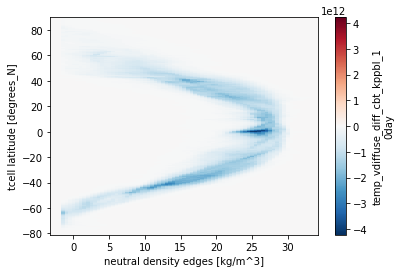

Psi_mean_1day


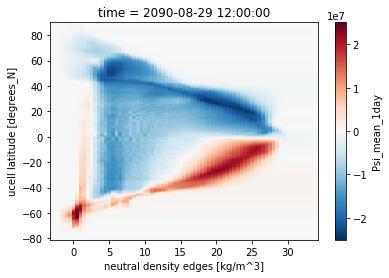

SF_1day


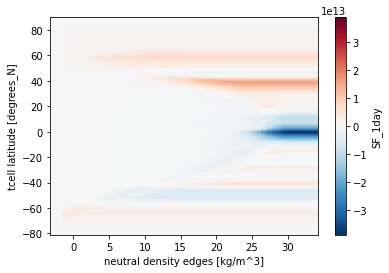

MX_1day


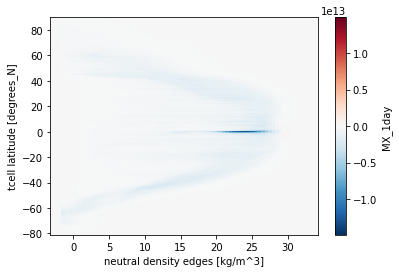

temp_nonlocal_KPP_1day


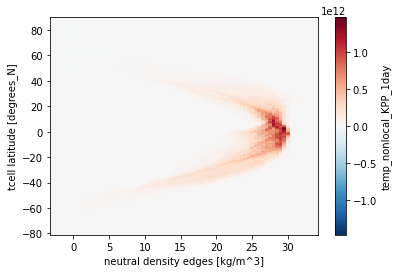

temp_vdiffuse_diff_cbt_kppish_1day


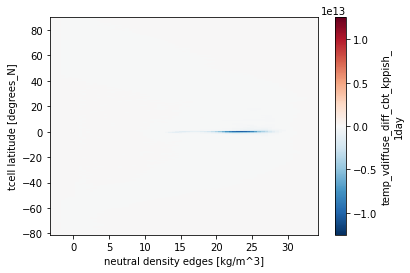

temp_vdiffuse_diff_cbt_kppbl_1day


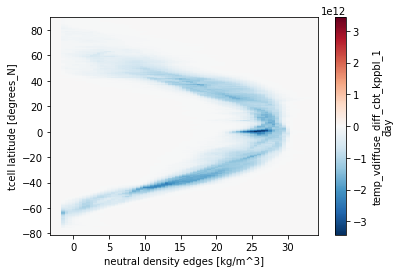

Psi_mean_10day


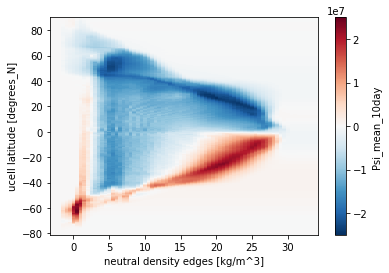

SF_10day


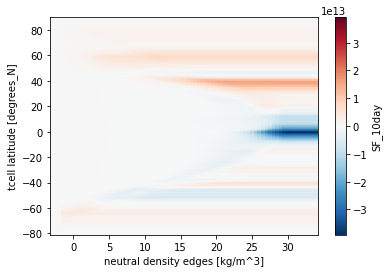

MX_10day


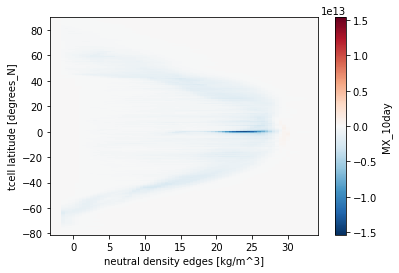

temp_nonlocal_KPP_10day


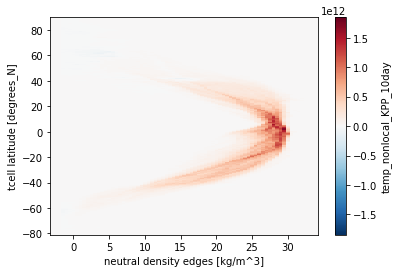

temp_vdiffuse_diff_cbt_kppish_10day


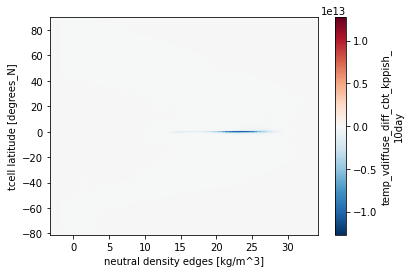

temp_vdiffuse_diff_cbt_kppbl_10day


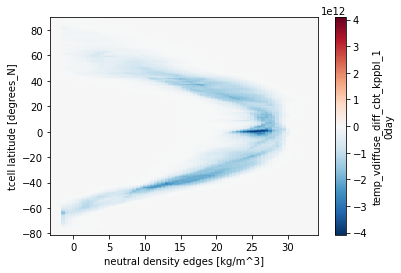

CPU times: user 24min 56s, sys: 4min 31s, total: 29min 27s
Wall time: 28min 47s


In [3]:
%%time
for year in np.arange (104,106):
    save_dir = '/g/data/e14/cy8964/Post_Process/10_year_daily_data/output'+str(year).zfill(3) +'/'

    for j in np.arange(6):
        daily_array_name = ['Psi_mean_1day', 'SF_1day', 'MX_1day', \
                            'temp_nonlocal_KPP_1day','temp_vdiffuse_diff_cbt_kppish_1day', \
                            'temp_vdiffuse_diff_cbt_kppbl_1day'][j]
        print(daily_array_name)
        mo = '0'
        term1 = xr.open_dataarray(save_dir+'1daily_mean_1year_means_'+daily_array_name+'_mo'+mo+'.nc')#.daily_array_name
        term1  = xr.zeros_like(term1)
        daylengths = [30,30,30,30,30,30,30,30,30,30,30,35]
        for k in np.arange(12):
            #print(k)
            term1_k = xr.open_dataarray(save_dir+'1daily_mean_1year_means_'+daily_array_name+'_mo'+str(k)+'.nc')
            term1 = term1+term1_k*daylengths[k]

        term1 = term1/365
        term1.load()
        term1.sum('grid_xt_ocean').plot()
        plt.show()
        ds = xr.Dataset({daily_array_name: term1})
        ds.to_netcdf(save_dir+'1daily_mean_1year_means_'+daily_array_name+'.nc', 
                     encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})
        
    
    for j in np.arange(6):
        daily_array_name = ['Psi_mean_10day', 'SF_10day', 'MX_10day', \
                            'temp_nonlocal_KPP_10day','temp_vdiffuse_diff_cbt_kppish_10day', \
                            'temp_vdiffuse_diff_cbt_kppbl_10day'][j]
        print(daily_array_name)
        mo = '0'
        term1 = xr.open_dataarray(save_dir+'10daily_mean_1year_means_'+daily_array_name+'_mo'+mo+'.nc')#.daily_array_name
        term1  = xr.zeros_like(term1)
        daylengths = [30,30,30,30,30,30,30,30,30,30,30,35]
        for k in np.arange(12):
            #print(k)
            term1_k = xr.open_dataarray(save_dir+'10daily_mean_1year_means_'+daily_array_name+'_mo'+str(k)+'.nc')
            term1 = term1+term1_k*daylengths[k]

        term1 = term1/365
        term1.load()
        term1.sum('grid_xt_ocean').plot()
        plt.show()
        ds = xr.Dataset({daily_array_name: term1})
        ds.to_netcdf(save_dir+'10daily_mean_1year_means_'+daily_array_name+'.nc', 
                     encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})


Just 10daily means

0
1
2
3
4
5
6
7
8
9
10
11


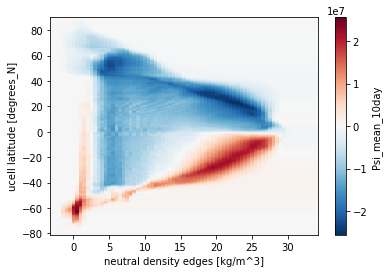

0
1
2
3
4
5
6
7
8
9
10
11


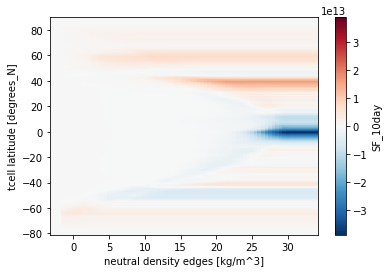

0
1
2
3
4
5
6
7
8
9
10
11


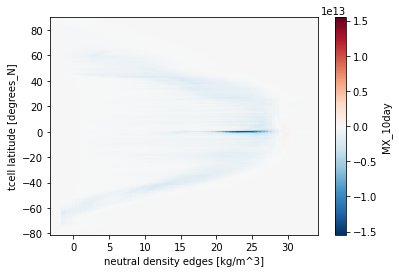

0
1
2
3
4
5
6
7
8
9
10
11


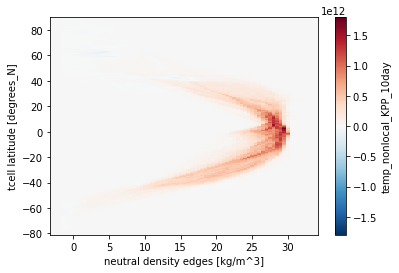

0
1
2
3
4
5
6
7
8
9
10
11


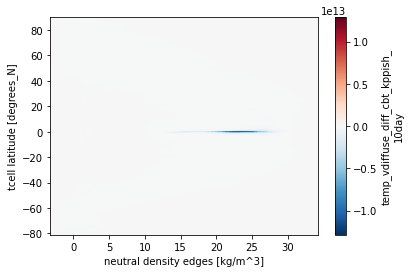

0
1
2
3
4
5
6
7
8
9
10
11


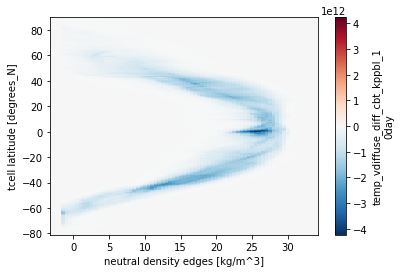

CPU times: user 6min 14s, sys: 1min 9s, total: 7min 24s
Wall time: 7min 5s


In [7]:
%%time
save_dir = '/g/data/e14/cy8964/Post_Process/10_year_daily_data/output'+str(year).zfill(3) +'/'

for j in np.arange(6):
    daily_array_name = ['Psi_mean_10day', 'SF_10day', 'MX_10day', \
                        'temp_nonlocal_KPP_10day','temp_vdiffuse_diff_cbt_kppish_10day', \
                        'temp_vdiffuse_diff_cbt_kppbl_10day'][j]
    mo = '0'
    term1 = xr.open_dataarray(save_dir+'10daily_mean_1year_means_'+daily_array_name+'_mo'+mo+'.nc')#.daily_array_name
    term1  = xr.zeros_like(term1)
    daylengths = [30,30,30,30,30,30,30,30,30,30,30,35]
    for k in np.arange(12):
        print(k)
        term1_k = xr.open_dataarray(save_dir+'10daily_mean_1year_means_'+daily_array_name+'_mo'+str(k)+'.nc')
        term1 = term1+term1_k*daylengths[k]

    term1 = term1/365
    term1.load()
    term1.sum('grid_xt_ocean').plot()
    plt.show()
    ds = xr.Dataset({daily_array_name: term1})
    ds.to_netcdf(save_dir+'10daily_mean_1year_means_'+daily_array_name+'.nc', 
                 encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})


### Compare to original by plotting difference zonal averages

In [9]:
Tenday_mean_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/10day_mean_1year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
Oneday_mean_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/1day_mean_1year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})


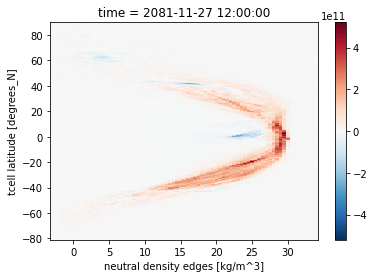

In [32]:
new = xr.open_mfdataset(save_dir+'1daily_mean_1year_means_SF_1day.nc')['SF_1day']
new2 = xr.open_mfdataset(save_dir+'10daily_mean_1year_means_SF_10day.nc')['SF_10day']

(new-new2).sum('grid_xt_ocean').plot()

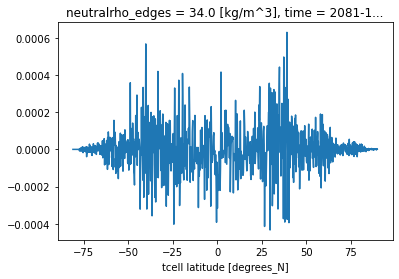

In [33]:
(new-new2).sum('grid_xt_ocean').isel(neutralrho_edges = -1).plot()

Psi_mean_10day


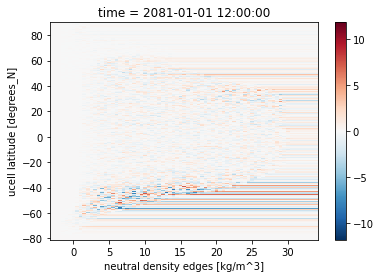

SF_10day


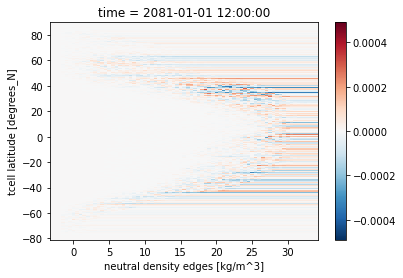

MX_10day


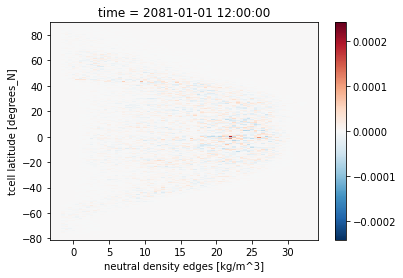

Psi_mean_1day


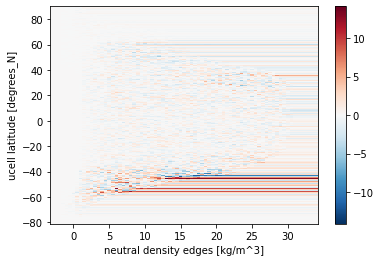

SF_1day


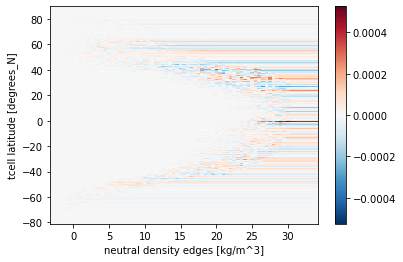

MX_1day


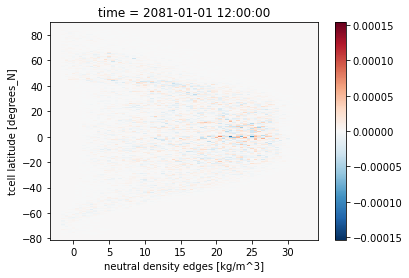

In [28]:
year = 96
save_dir = '/g/data/e14/cy8964/Post_Process/10_year_daily_data/output'+str(year).zfill(3) +'/'

for j in np.arange(3):
    daily_array_name = ['Psi_mean_10day', 'SF_10day', 'MX_10day', \
                        'temp_nonlocal_KPP_10day','temp_vdiffuse_diff_cbt_kppish_10day', \
                        'temp_vdiffuse_diff_cbt_kppbl_10day'][j]
    proper_name = ['Psi', 'SF', 'MX', \
                        'temp_nonlocal_KPP','temp_vdiffuse_diff_cbt_kppish', \
                        'temp_vdiffuse_diff_cbt_kppbl'][j]
    
    new = xr.open_mfdataset(save_dir+'10daily_mean_1year_means_'+daily_array_name+'.nc')[daily_array_name]
    old = Tenday_mean_1year_means[ proper_name ]
    print(daily_array_name)
    (new-old).sum('grid_xt_ocean').plot()
    plt.show()
    
for j in np.arange(3):
    daily_array_name = ['Psi_mean_1day', 'SF_1day', 'MX_1day', \
                        'temp_nonlocal_KPP_1day','temp_vdiffuse_diff_cbt_kppish_1day', \
                        'temp_vdiffuse_diff_cbt_kppbl_1day'][j]
    proper_name = ['Psi', 'SF', 'MX', \
                        'temp_nonlocal_KPP','temp_vdiffuse_diff_cbt_kppish', \
                        'temp_vdiffuse_diff_cbt_kppbl'][j]
    new = xr.open_mfdataset(save_dir+'1daily_mean_1year_means_'+daily_array_name+'.nc')[daily_array_name]
    old = Oneday_mean_1year_means[ proper_name ]
    print(daily_array_name)    
    (new-old).sum('grid_xt_ocean').plot()
    plt.show()

It's correct to within rounding error.... run the remaining 9 years.

## Combine all 10 years into one 

96
97
98
99
100
101
102
103
104
105


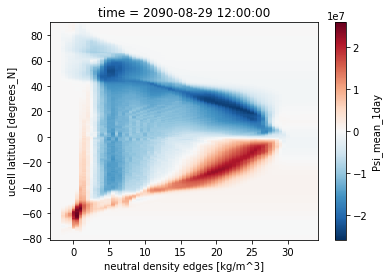

96
97
98
99
100
101
102
103
104
105


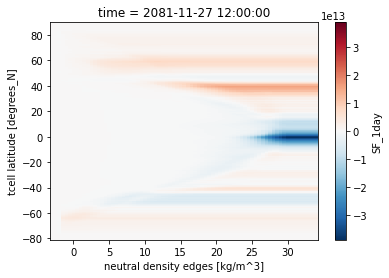

96
97
98
99
100
101
102
103
104
105


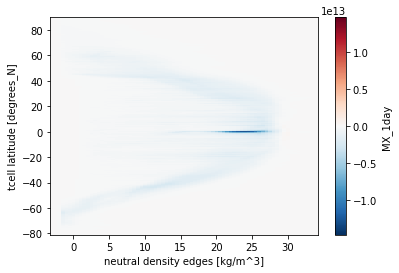

96
97
98
99
100
101
102
103
104
105


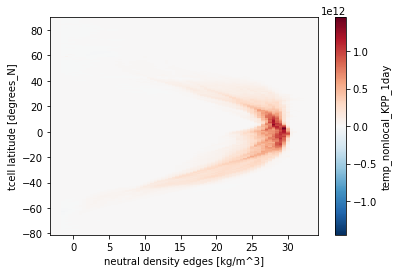

96
97
98
99
100
101
102
103
104
105


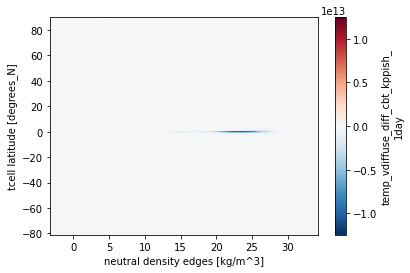

96
97
98
99
100
101
102
103
104
105


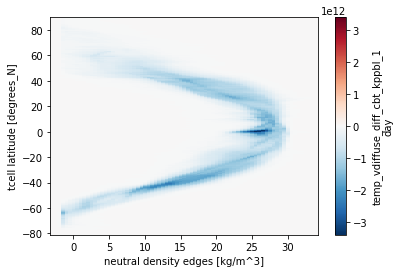

CPU times: user 5min 6s, sys: 39.7 s, total: 5min 45s
Wall time: 5min 22s


In [4]:
%%time

for j in np.arange(6):
    daily_array_name = ['Psi_mean_1day', 'SF_1day', 'MX_1day', \
                        'temp_nonlocal_KPP_1day','temp_vdiffuse_diff_cbt_kppish_1day', \
                        'temp_vdiffuse_diff_cbt_kppbl_1day'][j]
    year = 96
    save_dir_begin = '/g/data/e14/cy8964/Post_Process/10_year_daily_data/output'
    output_yr = str(year).zfill(3) +'/'
    save_dir = save_dir_begin+output_yr

    term1 = xr.open_dataarray(save_dir+'1daily_mean_1year_means_'+daily_array_name+'.nc')#.daily_array_name
    term1  = xr.zeros_like(term1)
    for year in np.arange(96,106):
        print(year)
        output_yr = str(year).zfill(3) +'/'
        save_dir = save_dir_begin+output_yr
        term1_k = xr.open_dataarray(save_dir+'1daily_mean_1year_means_'+daily_array_name+'.nc')
        term1 = term1+term1_k

    term1 = term1/10
    term1.load()
    term1.sum('grid_xt_ocean').plot()
    plt.show()
    ds = xr.Dataset({daily_array_name: term1})
    ds.to_netcdf('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/'+'1daily_mean_10year_means_'+daily_array_name+'.nc', 
                 encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})


96
97
98
99
100
101
102
103
104
105


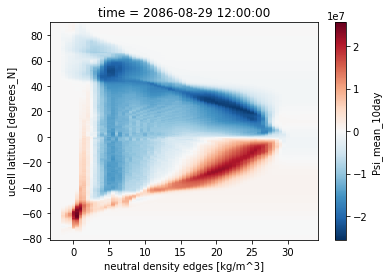

96
97
98
99
100
101
102
103
104
105


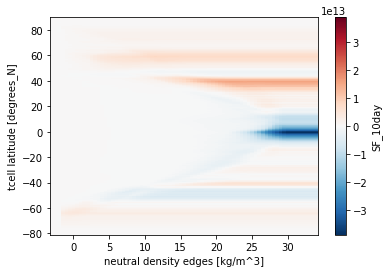

96
97
98
99
100
101
102
103
104
105


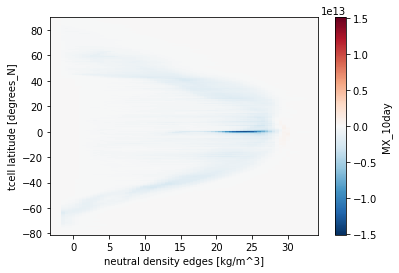

96
97
98
99
100
101
102
103
104
105


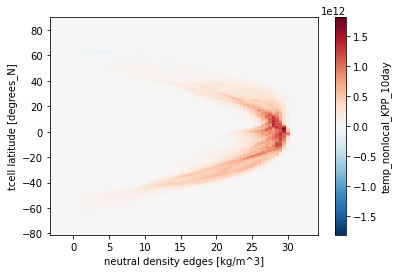

96
97
98
99
100
101
102
103
104
105


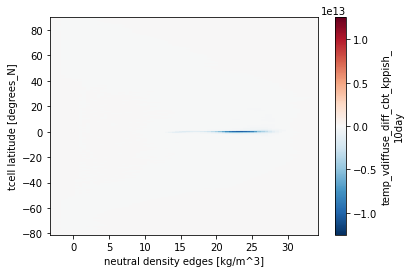

96
97
98
99
100
101
102
103
104
105


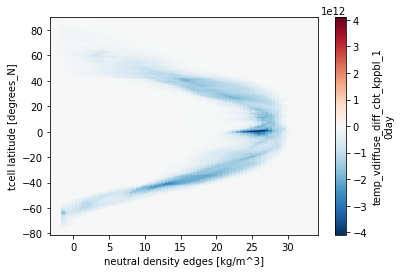

CPU times: user 5min 41s, sys: 53.2 s, total: 6min 34s
Wall time: 6min 16s


In [5]:
%%time

for j in np.arange(6):
    daily_array_name = ['Psi_mean_10day', 'SF_10day', 'MX_10day', \
                        'temp_nonlocal_KPP_10day','temp_vdiffuse_diff_cbt_kppish_10day', \
                        'temp_vdiffuse_diff_cbt_kppbl_10day'][j]
    year = 96
    save_dir_begin = '/g/data/e14/cy8964/Post_Process/10_year_daily_data/output'
    output_yr = str(year).zfill(3) +'/'
    save_dir = save_dir_begin+output_yr

    term1 = xr.open_dataarray(save_dir+'10daily_mean_1year_means_'+daily_array_name+'.nc')#.daily_array_name
    term1  = xr.zeros_like(term1)
    for year in np.arange(96,106):
        print(year)
        output_yr = str(year).zfill(3) +'/'
        save_dir = save_dir_begin+output_yr
        term1_k = xr.open_dataarray(save_dir+'10daily_mean_1year_means_'+daily_array_name+'.nc')
        term1 = term1+term1_k

    term1 = term1/10
    term1.load()
    term1.sum('grid_xt_ocean').plot()
    plt.show()
    ds = xr.Dataset({daily_array_name: term1})
    ds.to_netcdf('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/'+'10daily_mean_10year_means_'+daily_array_name+'.nc', 
                 encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})


# Combine all variables into one dataset

In [24]:
# load from PBS script output
dir_base = '/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/'
Psi_mean_1day = xr.open_dataset(dir_base+'1daily_mean_10year_means_Psi_mean_1day.nc').Psi_mean_1day.drop('time')
SF_1day = xr.open_dataset(dir_base+'1daily_mean_10year_means_SF_1day.nc').SF_1day.drop('time')
MX_1day = xr.open_dataset(dir_base+'1daily_mean_10year_means_MX_1day.nc').MX_1day
temp_vdiffuse_diff_cbt_kppish_1day = xr.open_dataset(dir_base+'1daily_mean_10year_means_temp_vdiffuse_diff_cbt_kppish_1day.nc').temp_vdiffuse_diff_cbt_kppish_1day 
temp_vdiffuse_diff_cbt_kppbl_1day= xr.open_dataset(dir_base+'1daily_mean_10year_means_temp_vdiffuse_diff_cbt_kppbl_1day.nc').temp_vdiffuse_diff_cbt_kppbl_1day
temp_nonlocal_KPP_1day= xr.open_dataset(dir_base+'1daily_mean_10year_means_temp_nonlocal_KPP_1day.nc').temp_nonlocal_KPP_1day


In [30]:
# save to array
ds = xr.Dataset({'Psi': Psi_mean_1day, 'SF': SF_1day, 'MX': MX_1day,\
                'temp_vdiffuse_diff_cbt_kppish':temp_vdiffuse_diff_cbt_kppish_1day, \
                'temp_vdiffuse_diff_cbt_kppbl':temp_vdiffuse_diff_cbt_kppbl_1day,\
                'temp_nonlocal_KPP':temp_nonlocal_KPP_1day})
ds.to_netcdf(dir_base+'1day_mean_10year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_nonlocal_KPP': {'shuffle': True, 'zlib': True, 'complevel': 5}})


In [27]:
# load from PBS script output
dir_base = '/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/'
Psi_mean_10day = xr.open_dataset(dir_base+'10daily_mean_10year_means_Psi_mean_10day.nc').Psi_mean_10day
SF_10day = xr.open_dataset(dir_base+'10daily_mean_10year_means_SF_10day.nc').SF_10day
MX_10day = xr.open_dataset(dir_base+'10daily_mean_10year_means_MX_10day.nc').MX_10day
temp_vdiffuse_diff_cbt_kppish_10day = xr.open_dataset(dir_base+'10daily_mean_10year_means_temp_vdiffuse_diff_cbt_kppish_10day.nc').temp_vdiffuse_diff_cbt_kppish_10day 
temp_vdiffuse_diff_cbt_kppbl_10day= xr.open_dataset(dir_base+'10daily_mean_10year_means_temp_vdiffuse_diff_cbt_kppbl_10day.nc').temp_vdiffuse_diff_cbt_kppbl_10day
temp_nonlocal_KPP_10day= xr.open_dataset(dir_base+'10daily_mean_10year_means_temp_nonlocal_KPP_10day.nc').temp_nonlocal_KPP_10day


In [29]:
# save to array
ds = xr.Dataset({'Psi': Psi_mean_10day, 'SF': SF_10day, 'MX': MX_10day,\
                'temp_vdiffuse_diff_cbt_kppish':temp_vdiffuse_diff_cbt_kppish_10day, \
                'temp_vdiffuse_diff_cbt_kppbl':temp_vdiffuse_diff_cbt_kppbl_10day,\
                'temp_nonlocal_KPP':temp_nonlocal_KPP_10day})
ds.to_netcdf(dir_base+'10day_mean_10year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_nonlocal_KPP': {'shuffle': True, 'zlib': True, 'complevel': 5}})
